## AlZheimer's Disease Dataset

#### <font color="red">Demographic Details</font>: Age, Gender, Ethnicity, EducationLevel
#### <font color="red">Lifestyle Factors</font>: BMI, Smoking, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality
#### <font color="red">Medical History</font>: FamilyHistoryAlzheimers, CardiovascularDisease, Diabetes, Depression, HeadInjury, Hypertension
#### <font color="red">Clinical Measurements</font>: SystolicBP, DiastolicBP, CholestrolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides
#### <font color="red">Cognitive and Functional Assessments</font>: MMSE, FunctionalAssessment, MemoryComplaints, BehavioralProblems, ADL
#### <font color="red">Symptoms</font>: Confusion, Disorientation, PersonalityChanges, DifficultyCompletingTasks, Forgetfulness
#### <font color="red">Diagnosis Information</font>: <font color="lightgreen">Diagnosis</font> --> this is the target label
#### <font color="red">Unused Features</font>: PatientID, DoctorInCharge

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("alzheimers_modified_data.csv")
df.head()

PatientID Age Gender  Ethnicity EducationLevel                 BMI Smoking  \
0      4751  73      0          0              2  22.927749230993864       0   
1      4752  89      0          0              0   26.82768119159602       0   
2      4753  73      0          3              1  17.795882442817113       0   
3      4754  74      1          0              1   33.80081704413547       1   
4      4755  89      0          0              0  20.716973826446807       0   

   AlcoholConsumption   PhysicalActivity         DietQuality  ...  \
0   13.29721772827684  6.327112473553353  1.3472143059081076  ...   
1   4.542523817722191  7.619884540163032  0.5187671386507053  ...   
2   19.55508452555359  7.844987790974517   1.826334664579784  ...   
3  12.209265546203785  8.428001350491492    7.43560414000302  ...   
4   18.45435609061961  6.310460689360432  0.7954975089177474  ...   

  MemoryComplaints BehavioralProblems                 ADL Confusion  \
0                0                  0  1.7258834599441897         0   
1                0                  0  2.5924241326736475         0   
2                0                  0   7.119547742738579         0   
3                0                  1    6.48122585936608         0   
4                0                  0   0.014691221285652         0   

  Disorientation PersonalityChanges DifficultyCompletingTasks Forgetfulness  \
0              0                  0                         1             0   
1              0                  0                         0             1   
2              1                  0                         1             0   
3              0                  0                         0             0   
4              0                  1                         1             0   

  Diagnosis DoctorInCharge  
0         0      XXXConfid  
1         0      XXXConfid  
2         0      XXXConfid  
3         0      XXXConfid  
4         0      XXXConfid  

[5 rows x 35 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   PatientID                  2149 non-null   object
 1   Age                        2149 non-null   object
 2   Gender                     2149 non-null   object
 3   Ethnicity                  2149 non-null   int64 
 4   EducationLevel             2149 non-null   object
 5   BMI                        2149 non-null   object
 6   Smoking                    2149 non-null   object
 7   AlcoholConsumption         2149 non-null   object
 8   PhysicalActivity           2149 non-null   object
 9   DietQuality                2149 non-null   object
 10  SleepQuality               2149 non-null   object
 11  FamilyHistoryAlzheimers    2149 non-null   object
 12  CardiovascularDisease      2149 non-null   object
 13  Diabetes                   2149 non-null   object
 14  Depressi

In [ ]:
df.describe()

Ethnicity    Diagnosis
count  2149.000000  2149.000000
mean      0.697534     0.353653
std       0.996128     0.478214
min       0.000000     0.000000
25%       0.000000     0.000000
50%       0.000000     0.000000
75%       1.000000     1.000000
max       3.000000     1.000000

In [ ]:
df = df.drop('PatientID',axis=1)
df = df.drop('DoctorInCharge', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        2149 non-null   object
 1   Gender                     2149 non-null   object
 2   Ethnicity                  2149 non-null   int64 
 3   EducationLevel             2149 non-null   object
 4   BMI                        2149 non-null   object
 5   Smoking                    2149 non-null   object
 6   AlcoholConsumption         2149 non-null   object
 7   PhysicalActivity           2149 non-null   object
 8   DietQuality                2149 non-null   object
 9   SleepQuality               2149 non-null   object
 10  FamilyHistoryAlzheimers    2149 non-null   object
 11  CardiovascularDisease      2149 non-null   object
 12  Diabetes                   2149 non-null   object
 13  Depression                 2149 non-null   object
 14  HeadInju

In [ ]:
demographic_details = ["Age", "Gender", "Ethnicity", "EducationLevel"]
for feature in demographic_details:
    print(df[feature].value_counts())

Age
68              81
88              81
71              77
90              77
76              75
                ..
   61            1
  87             1
  missing        1
   88            1
   65            1
Name: count, Length: 85, dtype: int64
Gender
1               1033
0               1009
   1              35
  0               29
   0              22
  1               20
   MISSING         1
Name: count, dtype: int64
Ethnicity
0    1278
1     454
3     211
2     206
Name: count, dtype: int64
EducationLevel
1               820
2               604
0               420
3               198
  1              23
   2             19
  2              13
   0             13
  0              12
   1             11
   3              9
  3               5
  missing         2
Name: count, dtype: int64


In [ ]:
for feature in demographic_details:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
    
print(df[demographic_details].isna().sum())

Age               2
Gender            1
Ethnicity         0
EducationLevel    2
dtype: int64


In [ ]:
for feature in demographic_details:
    print(df[feature].name, df[feature].unique())

Age [73. 89. 74. 86. 68. 75. 72. 87. 78. 84. 64. 69. 63. 65. 82. 77. 71. 83.
 79. 67. 66. 70. 85. 60. 88. 62. 81. 61. 80. 90. 76. nan]
Gender [ 0.  1. nan]
Ethnicity [0 3 1 2]
EducationLevel [ 2.  0.  1.  3. nan]


In [ ]:
df['Age'].describe()

count    2147.000000
mean       74.918957
std         8.988185
min        60.000000
25%        67.000000
50%        75.000000
75%        83.000000
max        90.000000
Name: Age, dtype: float64

In [ ]:
df['Age']=df['Age'].fillna(int(df['Age'].mean()))
df=df.dropna(subset=['Gender'])
df['EducationLevel']=df['EducationLevel'].fillna(df['EducationLevel'].mode()[0])

In [ ]:
for feature in demographic_details:
    print(df[feature].name, df[feature].unique())

Age [73. 89. 74. 86. 68. 75. 72. 87. 78. 84. 64. 69. 63. 65. 82. 77. 71. 83.
 79. 67. 66. 70. 85. 60. 88. 62. 81. 61. 80. 90. 76.]
Gender [0. 1.]
Ethnicity [0 3 1 2]
EducationLevel [2. 0. 1. 3.]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2148 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2148 non-null   float64
 1   Gender                     2148 non-null   float64
 2   Ethnicity                  2148 non-null   int64  
 3   EducationLevel             2148 non-null   float64
 4   BMI                        2148 non-null   object 
 5   Smoking                    2148 non-null   object 
 6   AlcoholConsumption         2148 non-null   object 
 7   PhysicalActivity           2148 non-null   object 
 8   DietQuality                2148 non-null   object 
 9   SleepQuality               2148 non-null   object 
 10  FamilyHistoryAlzheimers    2148 non-null   object 
 11  CardiovascularDisease      2148 non-null   object 
 12  Diabetes                   2148 non-null   object 
 13  Depression                 2148 non-null   object 
 1

In [ ]:
lifestyle_factors = ['BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality']
for feature in lifestyle_factors:
    print(df[feature].value_counts())

BMI
   MISSING            4
  missing             2
37.079982995306096    1
30.664356273380346    1
36.15572775036195     1
                     ..
22.463382649410605    1
26.770945999107717    1
28.8706523860396      1
27.942862734988346    1
18.04591747393549     1
Name: count, Length: 2144, dtype: int64
Smoking
0               1446
1                596
  0               42
   0              38
  1               12
   1              10
   MISSING         3
  missing          1
Name: count, dtype: int64
AlcoholConsumption
7.890703150840494     1
13.29721772827684     1
4.542523817722191     1
19.55508452555359     1
8.264128073381773     1
                     ..
12.167847629604712    1
13.723825705512622    1
0.6460472705489217    1
4.140143784276235     1
18.45435609061961     1
Name: count, Length: 2148, dtype: int64
PhysicalActivity
  missing             2
3.7881254559083457    1
5.235067975618416     1
8.428001350491492     1
3.850204374601151     1
                     ..
9.7145

In [ ]:
for feature in lifestyle_factors:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
    
print(df[lifestyle_factors].isna().sum())

BMI                   6
Smoking               4
AlcoholConsumption    1
PhysicalActivity      3
DietQuality           4
SleepQuality          4
dtype: int64


In [ ]:
df['Smoking'].unique()

array([ 0.,  1., nan])

In [ ]:
df[lifestyle_factors].describe()

BMI      Smoking  AlcoholConsumption  PhysicalActivity  \
count  2142.000000  2144.000000         2147.000000       2145.000000   
mean     27.659301     0.288246           10.041712          4.921333   
std       7.222649     0.453052            5.758180          2.857311   
min      15.008851     0.000000            0.002003          0.003616   
25%      21.612506     0.000000            5.147876          2.570626   
50%      27.825689     0.000000            9.934412          4.773200   
75%      33.874926     1.000000           15.162518          7.427899   
max      39.992767     1.000000           19.989293          9.987429   

       DietQuality  SleepQuality  
count  2144.000000   2144.000000  
mean      4.993063      7.048869  
std       2.909961      1.763752  
min       0.009385      4.002629  
25%       2.456650      5.482234  
50%       5.073478      7.113014  
75%       7.559202      8.561544  
max       9.998346      9.999840

In [ ]:
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['Smoking'] = df['Smoking'].fillna(df['Smoking'].mode()[0])
df['AlcoholConsumption'] = df['AlcoholConsumption'].fillna(df['AlcoholConsumption'].mean())
df['PhysicalActivity'] = df['PhysicalActivity'].fillna(df['PhysicalActivity'].mean())
df['DietQuality'] = df['DietQuality'].fillna(df['DietQuality'].mean())
df['SleepQuality'] = df['SleepQuality'].fillna(df['SleepQuality'].mean())

In [ ]:
df[lifestyle_factors].isna().sum()

BMI                   0
Smoking               0
AlcoholConsumption    0
PhysicalActivity      0
DietQuality           0
SleepQuality          0
dtype: int64

In [ ]:
medical_history = ['FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension']
for feature in medical_history:
    print(df[feature].value_counts())

FamilyHistoryAlzheimers
0               1529
1                513
   0              42
  0               33
   1              18
  1               10
   MISSING         3
Name: count, dtype: int64
CardiovascularDisease
0               1744
1                298
   0              50
  0               41
  1                8
   1               4
   MISSING         2
  missing          1
Name: count, dtype: int64
Diabetes
0               1740
1                302
  0               42
   0              38
  1               11
   1              10
   MISSING         3
  missing          2
Name: count, dtype: int64
Depression
0               1631
1                411
  0               44
   0              40
   1              11
  1                9
   MISSING         2
Name: count, dtype: int64
HeadInjury
0               1852
1                190
   0              49
  0               46
  1                4
   1               4
   MISSING         3
Name: count, dtype: int64
Hypertension
0  

In [ ]:
for feature in medical_history:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
    
print(df[medical_history].isna().sum())

FamilyHistoryAlzheimers    3
CardiovascularDisease      3
Diabetes                   5
Depression                 2
HeadInjury                 3
Hypertension               1
dtype: int64


In [ ]:
for feature in medical_history:
    print(df[feature].unique())

[ 0.  1. nan]
[ 0.  1. nan]
[ 1.  0. nan]
[ 1.  0. nan]
[ 0.  1. nan]
[ 0.  1. nan]


In [ ]:
for feature in medical_history:
    df[feature] = df[feature].fillna(df[feature].mode().iloc[0])
df[medical_history].isna().sum()

FamilyHistoryAlzheimers    0
CardiovascularDisease      0
Diabetes                   0
Depression                 0
HeadInjury                 0
Hypertension               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2148 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2148 non-null   float64
 1   Gender                     2148 non-null   float64
 2   Ethnicity                  2148 non-null   int64  
 3   EducationLevel             2148 non-null   float64
 4   BMI                        2148 non-null   float64
 5   Smoking                    2148 non-null   float64
 6   AlcoholConsumption         2148 non-null   float64
 7   PhysicalActivity           2148 non-null   float64
 8   DietQuality                2148 non-null   float64
 9   SleepQuality               2148 non-null   float64
 10  FamilyHistoryAlzheimers    2148 non-null   float64
 11  CardiovascularDisease      2148 non-null   float64
 12  Diabetes                   2148 non-null   float64
 13  Depression                 2148 non-null   float64
 1

In [ ]:
clinical_meassurements = ['SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides']
for feature in clinical_meassurements:
    print(df[feature].value_counts())

SystolicBP
106         33
160         33
155         33
130         32
165         31
            ..
  100        1
   176       1
  137        1
   147       1
   106       1
Name: count, Length: 165, dtype: int64
DiastolicBP
61          49
62          45
102         44
116         44
71          43
            ..
   76        1
  116        1
  110        1
   60        1
   66        1
Name: count, Length: 138, dtype: int64
CholesterolTotal
  missing             2
   MISSING            2
183.1123334671573     1
242.3668396963656     1
275.33547502689123    1
                     ..
221.3053384595624     1
247.58461434698003    1
204.67075926226835    1
200.50012324501552    1
231.16259501016503    1
Name: count, Length: 2146, dtype: int64
CholesterolLDL
  missing             2
132.21231626655373    1
83.2193287068369      1
65.36663683521382     1
137.2870103103753     1
                     ..
193.90848144359904    1
97.75564857738568     1
181.0235603909688     1
101.2581963749311

In [ ]:
for feature in clinical_meassurements:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
print(df[clinical_meassurements].isna().sum())

SystolicBP                  4
DiastolicBP                 3
CholesterolTotal            4
CholesterolLDL              2
CholesterolHDL              6
CholesterolTriglycerides    1
dtype: int64


In [ ]:
df[clinical_meassurements].describe()

SystolicBP  DiastolicBP  CholesterolTotal  CholesterolLDL  \
count  2144.000000  2145.000000       2144.000000     2146.000000   
mean    134.270989    89.822378        225.167081      124.274234   
std      25.955718    17.596314         42.508179       43.360656   
min      90.000000    60.000000        150.093316       50.230707   
25%     112.000000    74.000000        190.244382       87.141594   
50%     134.000000    90.000000        225.053613      123.282840   
75%     157.000000   105.000000        261.954755      161.541531   
max     179.000000   119.000000        299.993352      199.965665   

       CholesterolHDL  CholesterolTriglycerides  
count     2142.000000               2147.000000  
mean        59.443480                228.318182  
std         23.149538                102.020063  
min         20.003434                 50.407194  
25%         39.093484                137.567872  
50%         59.696246                230.367748  
75%         78.938637                314.938931  
max         99.980324                399.941862

In [ ]:
for feature in clinical_meassurements[0:2]:
    df[feature] = df[feature].fillna(df[feature].median())
for feature in clinical_meassurements[2:]:
    df[feature] = df[feature].fillna(df[feature].mean())

df[clinical_meassurements].isna().sum()

SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2148 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2148 non-null   float64
 1   Gender                     2148 non-null   float64
 2   Ethnicity                  2148 non-null   int64  
 3   EducationLevel             2148 non-null   float64
 4   BMI                        2148 non-null   float64
 5   Smoking                    2148 non-null   float64
 6   AlcoholConsumption         2148 non-null   float64
 7   PhysicalActivity           2148 non-null   float64
 8   DietQuality                2148 non-null   float64
 9   SleepQuality               2148 non-null   float64
 10  FamilyHistoryAlzheimers    2148 non-null   float64
 11  CardiovascularDisease      2148 non-null   float64
 12  Diabetes                   2148 non-null   float64
 13  Depression                 2148 non-null   float64
 1

In [ ]:
Cognitive_Functional_Assessments = ['MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL']
for feature in Cognitive_Functional_Assessments:
    print(df[feature].value_counts())

MMSE
  missing             2
3.927142966083492     1
5.727075112421458     1
13.991127243891668    1
13.380935515909968    1
                     ..
10.786498514103378    1
22.715161212568912    1
7.167602257309024     1
18.049293886661907    1
15.54470579280538     1
Name: count, Length: 2147, dtype: int64
FunctionalAssessment
   MISSING            2
1.539710098426008     1
2.2698098696055258    1
8.965106303658107     1
4.279582904478101     1
                     ..
6.7916856212055645    1
3.743028013922194     1
9.36594632181196      1
4.0195462370333335    1
5.189535531063215     1
Name: count, Length: 2147, dtype: int64
MemoryComplaints
0               1617
1                425
   0              43
  0               38
  1               15
   1               7
   MISSING         2
  missing          1
Name: count, dtype: int64
BehavioralProblems
0               1720
1                322
  0               45
   0              40
  1                8
   1               7
   MISSING

In [ ]:
for feature in Cognitive_Functional_Assessments:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
print(df[Cognitive_Functional_Assessments].isna().sum())

MMSE                    3
FunctionalAssessment    3
MemoryComplaints        3
BehavioralProblems      6
ADL                     4
dtype: int64


In [ ]:
df[Cognitive_Functional_Assessments].describe()

MMSE  FunctionalAssessment  MemoryComplaints  \
count  2145.000000           2145.000000       2145.000000   
mean     14.747446              5.079882          0.208392   
std       8.614109              2.893835          0.406253   
min       0.005312              0.000460          0.000000   
25%       7.159778              2.566281          0.000000   
50%      14.431449              5.092445          0.000000   
75%      22.161028              7.554324          0.000000   
max      29.991381              9.996467          1.000000   

       BehavioralProblems          ADL  
count         2142.000000  2144.000000  
mean             0.157330     4.986642  
std              0.364196     2.949172  
min              0.000000     0.001288  
25%              0.000000     2.352047  
50%              0.000000     5.040351  
75%              0.000000     7.582003  
max              1.000000     9.999747

In [ ]:
for feature in Cognitive_Functional_Assessments[0:2]:
    df[feature] = df[feature].fillna(df[feature].mean())
for feature in Cognitive_Functional_Assessments[2:4]:
    df[feature] = df[feature].fillna(df[feature].mode().iloc[0])
for feature in Cognitive_Functional_Assessments[4:]:
    df[feature] = df[feature].fillna(df[feature].mean())

In [ ]:
df[Cognitive_Functional_Assessments].isna().sum()

MMSE                    0
FunctionalAssessment    0
MemoryComplaints        0
BehavioralProblems      0
ADL                     0
dtype: int64

In [ ]:
df.describe()

Age       Gender    Ethnicity  EducationLevel          BMI  \
count  2148.000000  2148.000000  2148.000000     2148.000000  2148.000000   
mean     74.915736     0.506518     0.697858        1.286313    27.659301   
std       8.985465     0.500074     0.996246        0.903576     7.212549   
min      60.000000     0.000000     0.000000        0.000000    15.008851   
25%      67.000000     0.000000     0.000000        1.000000    21.627633   
50%      75.000000     1.000000     0.000000        1.000000    27.803719   
75%      83.000000     1.000000     1.000000        2.000000    33.860775   
max      90.000000     1.000000     3.000000        3.000000    39.992767   

           Smoking  AlcoholConsumption  PhysicalActivity  DietQuality  \
count  2148.000000         2148.000000       2148.000000  2148.000000   
mean      0.287709           10.041712          4.921333     4.993063   
std       0.452800            5.756839          2.855314     2.907249   
min       0.000000            0.002003          0.003616     0.009385   
25%       0.000000            5.151910          2.572631     2.461642   
50%       0.000000            9.935033          4.777627     5.064798   
75%       1.000000           15.160224          7.415267     7.547344   
max       1.000000           19.989293          9.987429     9.998346   

       SleepQuality  ...  CholesterolTotal  CholesterolLDL  CholesterolHDL  \
count   2148.000000  ...       2148.000000     2148.000000     2148.000000   
mean       7.048869  ...        225.167081      124.274234       59.443480   
std        1.762108  ...         42.468563       43.340455       23.117169   
min        4.002629  ...        150.093316       50.230707       20.003434   
25%        5.494938  ...        190.304814       87.177730       39.099840   
50%        7.106795  ...        225.166827      123.321109       59.577541   
75%        8.559487  ...        261.890627      161.522647       78.936434   
max        9.999840  ...        299.993352      199.965665       99.980324   

       CholesterolTriglycerides         MMSE  FunctionalAssessment  \
count               2148.000000  2148.000000           2148.000000   
mean                 228.318182    14.747446              5.079882   
std                  101.996302     8.608089              2.891813   
min                   50.407194     0.005312              0.000460   
25%                  137.575547     7.165646              2.567333   
50%                  230.334865    14.455330              5.086107   
75%                  314.888989    22.160673              7.548817   
max                  399.941862    29.991381              9.996467   

       MemoryComplaints  BehavioralProblems          ADL    Diagnosis  
count       2148.000000         2148.000000  2148.000000  2148.000000  
mean           0.208101            0.156890     4.986642     0.353818  
std            0.406044            0.363782     2.946423     0.478265  
min            0.000000            0.000000     0.001288     0.000000  
25%            0.000000            0.000000     2.353656     0.000000  
50%            0.000000            0.000000     5.037358     0.000000  
75%            0.000000            0.000000     7.581269     1.000000  
max            1.000000            1.000000     9.999747     1.000000  

[8 rows x 28 columns]

In [ ]:
symptoms = ['Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']
for feature in symptoms:
    print(df[feature].name, df[feature].unique())

Confusion ['0' '1' '   0  ' '  0   ' '   1  ' '  1   ' '  missing   ' '   MISSING  ']
Disorientation ['0' '1' '  1   ' '  0   ' '   0  ' '   1  ' '  missing   ' '   MISSING  ']
PersonalityChanges ['0' '1' '   0  ' '  0   ' '   1  ' '  missing   ' '  1   ' '   MISSING  ']
DifficultyCompletingTasks ['1' '0' '   MISSING  ' '  0   ' '   0  ' '   1  ' '  missing   ' '  1   ']
Forgetfulness ['0' '1' '   0  ' '   MISSING  ' '  0   ' '   1  ' '  1   ']


In [ ]:
for feature in symptoms:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
print(df[symptoms].isna().sum())

Confusion                    5
Disorientation               2
PersonalityChanges           4
DifficultyCompletingTasks    8
Forgetfulness                1
dtype: int64


In [ ]:
for feature in symptoms:
    print(df[feature].name, df[feature].unique())

Confusion [ 0.  1. nan]
Disorientation [ 0.  1. nan]
PersonalityChanges [ 0.  1. nan]
DifficultyCompletingTasks [ 1.  0. nan]
Forgetfulness [ 0.  1. nan]


In [ ]:
for feature in symptoms:
    df[feature] = df[feature].fillna(df[feature].mode().iloc[0])
print(df[symptoms].isna().sum())

Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
dtype: int64


In [ ]:
df['Diagnosis'].unique()

array([0, 1])

In [ ]:
df.isna().sum()[:15]

Age                        0
Gender                     0
Ethnicity                  0
EducationLevel             0
BMI                        0
Smoking                    0
AlcoholConsumption         0
PhysicalActivity           0
DietQuality                0
SleepQuality               0
FamilyHistoryAlzheimers    0
CardiovascularDisease      0
Diabetes                   0
Depression                 0
HeadInjury                 0
dtype: int64

In [ ]:
df.isna().sum()[15:]

Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosis                    0
dtype: int64

In [ ]:
df.describe()

Age       Gender    Ethnicity  EducationLevel          BMI  \
count  2148.000000  2148.000000  2148.000000     2148.000000  2148.000000   
mean     74.915736     0.506518     0.697858        1.286313    27.659301   
std       8.985465     0.500074     0.996246        0.903576     7.212549   
min      60.000000     0.000000     0.000000        0.000000    15.008851   
25%      67.000000     0.000000     0.000000        1.000000    21.627633   
50%      75.000000     1.000000     0.000000        1.000000    27.803719   
75%      83.000000     1.000000     1.000000        2.000000    33.860775   
max      90.000000     1.000000     3.000000        3.000000    39.992767   

           Smoking  AlcoholConsumption  PhysicalActivity  DietQuality  \
count  2148.000000         2148.000000       2148.000000  2148.000000   
mean      0.287709           10.041712          4.921333     4.993063   
std       0.452800            5.756839          2.855314     2.907249   
min       0.000000            0.002003          0.003616     0.009385   
25%       0.000000            5.151910          2.572631     2.461642   
50%       0.000000            9.935033          4.777627     5.064798   
75%       1.000000           15.160224          7.415267     7.547344   
max       1.000000           19.989293          9.987429     9.998346   

       SleepQuality  ...  FunctionalAssessment  MemoryComplaints  \
count   2148.000000  ...           2148.000000       2148.000000   
mean       7.048869  ...              5.079882          0.208101   
std        1.762108  ...              2.891813          0.406044   
min        4.002629  ...              0.000460          0.000000   
25%        5.494938  ...              2.567333          0.000000   
50%        7.106795  ...              5.086107          0.000000   
75%        8.559487  ...              7.548817          0.000000   
max        9.999840  ...              9.996467          1.000000   

       BehavioralProblems          ADL    Confusion  Disorientation  \
count         2148.000000  2148.000000  2148.000000     2148.000000   
mean             0.156890     4.986642     0.205307        0.158287   
std              0.363782     2.946423     0.404020        0.365095   
min              0.000000     0.001288     0.000000        0.000000   
25%              0.000000     2.353656     0.000000        0.000000   
50%              0.000000     5.037358     0.000000        0.000000   
75%              0.000000     7.581269     0.000000        0.000000   
max              1.000000     9.999747     1.000000        1.000000   

       PersonalityChanges  DifficultyCompletingTasks  Forgetfulness  \
count         2148.000000                2148.000000    2148.000000   
mean             0.150838                   0.157356       0.301676   
std              0.357974                   0.364221       0.459092   
min              0.000000                   0.000000       0.000000   
25%              0.000000                   0.000000       0.000000   
50%              0.000000                   0.000000       0.000000   
75%              0.000000                   0.000000       1.000000   
max              1.000000                   1.000000       1.000000   

         Diagnosis  
count  2148.000000  
mean      0.353818  
std       0.478265  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  

[8 rows x 33 columns]

In [ ]:
duplicates = df.duplicated()
count = 0
for d in duplicates:
    if d:
        count+=1
print(count)

0


# <font color='red'>Questions:</font>
### Which gender is more likely to get Alzheimer?
### Which ethnicity is more at risk of developing Alzheimer?
### Which age is more likely to get Alzheimer?
### Which variables are the strongest predictors of the diagnosis?
### Does forgetfulness have a positive correlation on diagnosis?
### Does family history influence the diagnosis? if yes:
### Which ethnicity are more likely to have alzheimer according to family history?

In [190]:
df.groupby('Gender')['Diagnosis'].value_counts()

Gender  Diagnosis
0.0     0            674
        1            386
1.0     0            714
        1            374
Name: count, dtype: int64

<Axes: >

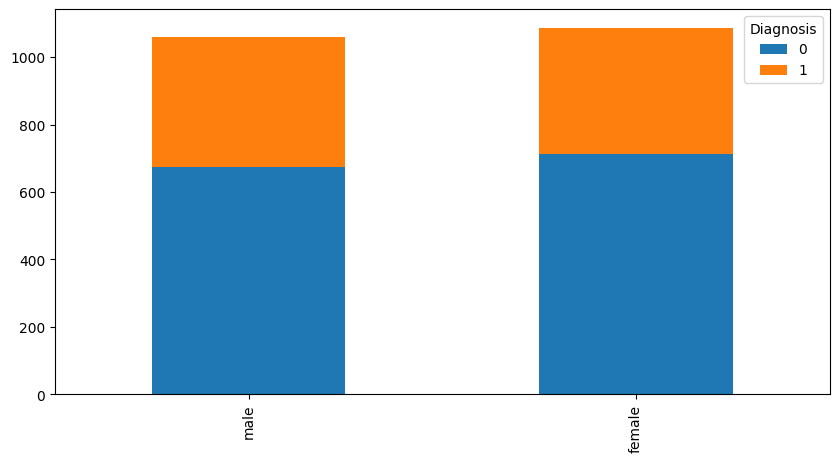

In [191]:
male = df[df['Gender']== 0]['Diagnosis'].value_counts()
female = df[df['Gender']== 1]['Diagnosis'].value_counts()
df3 = pd.DataFrame([male,female])
df3.index = ['male','female']
df3.plot(kind='bar',stacked=True, figsize=(10,5))

In [192]:
df2=df[df.Diagnosis==1]
df2['Ethnicity'].value_counts(normalize=True)

Ethnicity
0    0.609211
1    0.192105
2    0.110526
3    0.088158
Name: proportion, dtype: float64

<Axes: >

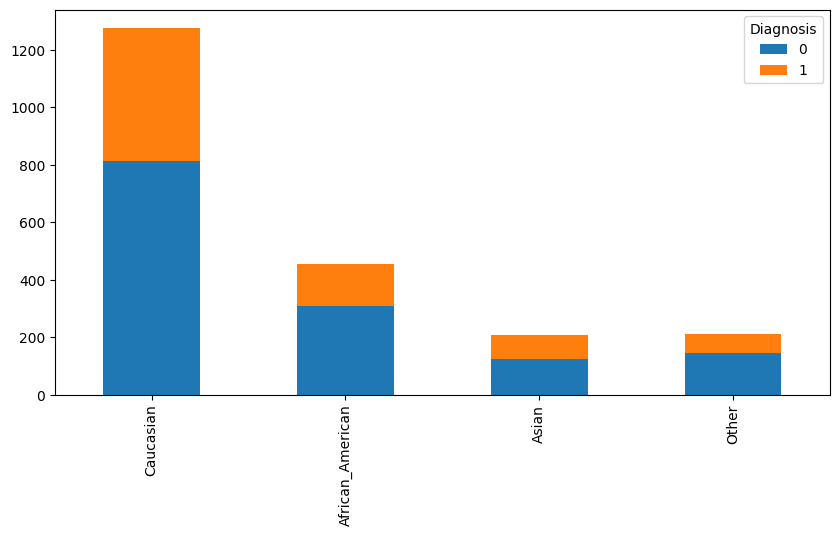

In [193]:
Caucasian = df[df['Ethnicity']== 0]['Diagnosis'].value_counts()
African_American = df[df['Ethnicity']== 1]['Diagnosis'].value_counts()
Asian=df[df['Ethnicity']== 2]['Diagnosis'].value_counts()
Other=df[df['Ethnicity']== 3]['Diagnosis'].value_counts()
df3 = pd.DataFrame([Caucasian,African_American,Asian,Other])
df3.index = ['Caucasian','African_American','Asian','Other']
df3.plot(kind='bar',stacked=True, figsize=(10,5))

In [194]:
df2.groupby('Diagnosis')['Age'].mean()

Diagnosis
1    74.842105
Name: Age, dtype: float64

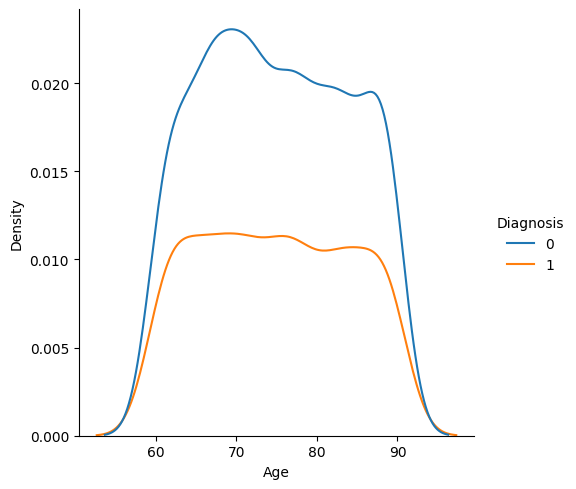

In [195]:
sns.displot(df, x="Age", hue="Diagnosis",kind="kde")
plt.show()

In [196]:
df.groupby('FamilyHistoryAlzheimers')['Diagnosis'].value_counts()

FamilyHistoryAlzheimers  Diagnosis
0.0                      0            1024
                         1             583
1.0                      0             364
                         1             177
Name: count, dtype: int64

<Axes: >

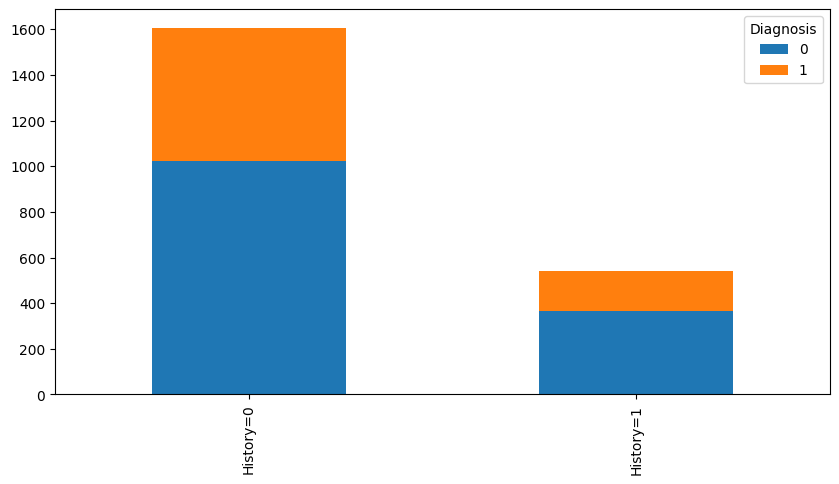

In [197]:
no = df[df['FamilyHistoryAlzheimers']== 0]['Diagnosis'].value_counts()
yes = df[df['FamilyHistoryAlzheimers']== 1]['Diagnosis'].value_counts()
df3 = pd.DataFrame([no,yes])
df3.index = ['History=0','History=1']
df3.plot(kind='bar',stacked=True, figsize=(10,5))

In [198]:
plt.figure(figsize=(30,15), dpi=500)
sns.heatmap(df.corr(),vmin=-1, vmax=1, xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

<Axes: >

# <font color="lightgreen">Conclusion:</font>
<ul>
    <li>Forgetfulness has apporximately no correlation with diagnosis!</li>
    <li>There are only five features that have a correlation ( positive or negative) with diagnosis.</li>
    <li>Family history doesn't influent the diagnosis.</li>
    <li>The number of males with Alzheimer is slightly higher than that of females.</li>
    <li>Caucasian ethnicity  has the highest number of people with Alzheimer.</li>

</ul>

# Scaling and Splitting

In [199]:
x = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]


In [200]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [201]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

<Axes: xlabel='MMSE', ylabel='Density'>

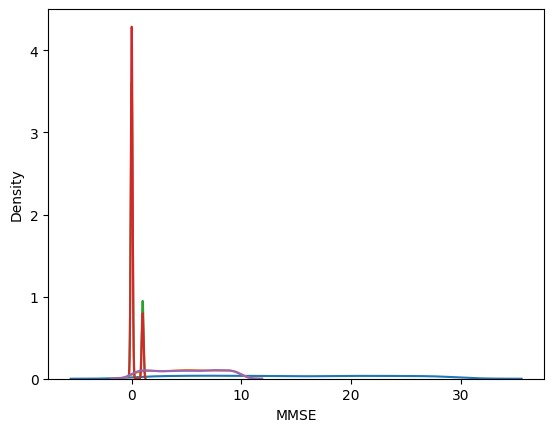

In [202]:
sns.kdeplot(x['MMSE'])
sns.kdeplot(x['FunctionalAssessment'])
sns.kdeplot(x['MemoryComplaints'])
sns.kdeplot(x['BehavioralProblems'])
sns.kdeplot(x['ADL'])

In [203]:
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train = pd.DataFrame(x_train, columns=x.columns)
x_test = pd.DataFrame(x_test, columns=x.columns)

<Axes: xlabel='MMSE', ylabel='Density'>

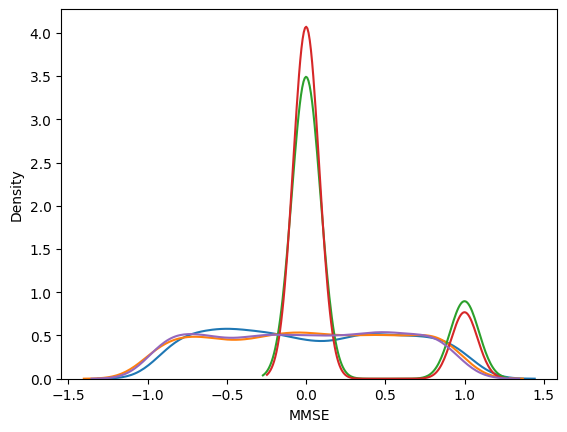

In [204]:
sns.kdeplot(x_train['MMSE'])
sns.kdeplot(x_train['FunctionalAssessment'])
sns.kdeplot(x_train['MemoryComplaints'])
sns.kdeplot(x_train['BehavioralProblems'])
sns.kdeplot(x_train['ADL'])

<Axes: xlabel='MMSE', ylabel='Density'>

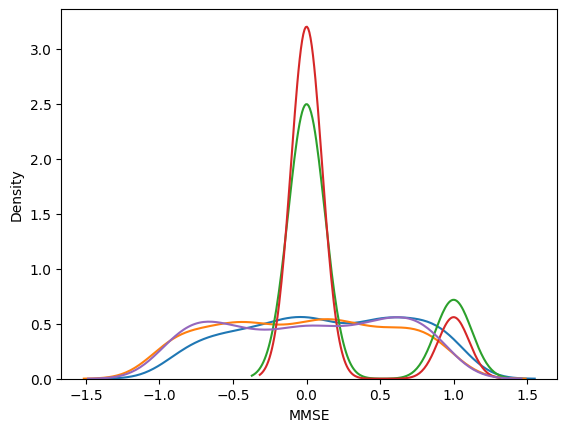

In [205]:
sns.kdeplot(x_test['MMSE'])
sns.kdeplot(x_test['FunctionalAssessment'])
sns.kdeplot(x_test['MemoryComplaints'])
sns.kdeplot(x_test['BehavioralProblems'])
sns.kdeplot(x_test['ADL'])

<h1>Featrue Selection</h1>

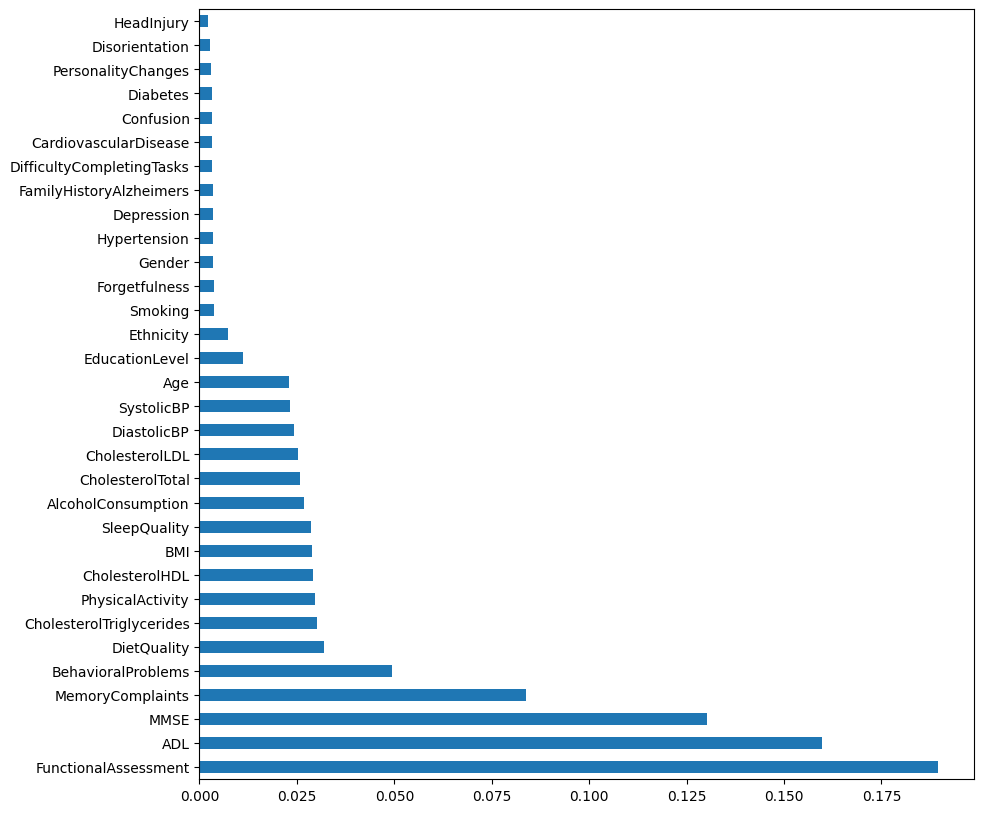

In [206]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x,y)
#plot graph of feature importance
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(33).plot(figsize=(10,10),kind='barh')
plt.show()

In [207]:
# Apply feature selection to choose the best 17 features

# Apply min max scaling to avoid negative values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)


from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=17)
x_selected = selector.fit_transform(x_scaled, y)

# Get the names of the selected features
selected_features = x.columns[selector.get_support()]
print(selected_features)

Index(['Gender', 'EducationLevel', 'SleepQuality', 'FamilyHistoryAlzheimers',
       'CardiovascularDisease', 'Diabetes', 'HeadInjury', 'Hypertension',
       'CholesterolHDL', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints',
       'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation',
       'PersonalityChanges'],
      dtype='object')


In [208]:
# Create the dataframe of selected features using x_selected and selected_features names

x_selected = pd.DataFrame(x_selected, columns=selected_features)
x_selected.head()

Gender  EducationLevel  SleepQuality  FamilyHistoryAlzheimers  \
0     0.0        0.666667      0.837564                      0.0   
1     0.0        0.000000      0.525021                      0.0   
2     0.0        0.333333      0.945597                      1.0   
3     1.0        0.333333      0.731994                      0.0   
4     0.0        0.000000      0.265892                      0.0   

   CardiovascularDisease  Diabetes  HeadInjury  Hypertension  CholesterolHDL  \
0                    0.0       1.0         0.0           0.0        0.171039   
1                    0.0       0.0         0.0           0.0        0.738026   
2                    0.0       0.0         0.0           0.0        0.622290   
3                    0.0       0.0         0.0           0.0        0.605851   
4                    0.0       0.0         0.0           0.0        0.461019   

       MMSE  FunctionalAssessment  MemoryComplaints  BehavioralProblems  \
0  0.715606              0.652102               0.0                 0.0   
1  0.687251              0.712108               0.0                 0.0   
2  0.245145              0.589697               0.0                 0.0   
3  0.466410              0.896823               0.0                 1.0   
4  0.450619              0.604699               0.0                 0.0   

        ADL  Confusion  Disorientation  PersonalityChanges  
0  0.172486        0.0             0.0                 0.0  
1  0.259154        0.0             0.0                 0.0  
2  0.711936        0.0             1.0                 0.0  
3  0.648094        0.0             0.0                 0.0  
4  0.001341        0.0             0.0                 1.0

In [209]:
#Split the new data
x_train, x_test, y_train, y_test = train_test_split(x_selected, y, test_size = 0.2, random_state = 1, stratify=y )


In [210]:
# Apply smoteenn on x_train and y_train to handle imbalance

from imblearn.combine import SMOTEENN
from collections import Counter

# Initialize the SMOTEENN object
smote_enn = SMOTEENN(random_state=1)

# Apply the SMOTEENN to balance the dataset
X_resampled, y_resampled = smote_enn.fit_resample(x_train, y_train)

# Print the class distribution before and after resampling
print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_resampled))

Original class distribution: Counter({0: 1110, 1: 608})
Resampled class distribution: Counter({1: 746, 0: 570})


In [211]:
x_train = X_resampled
y_train = y_resampled

<h1>Modelling</h1>

In [8]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report


In [9]:
single_models = {
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}
ensemble_models = {
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
}
param_grids = {
    'KNN': {'n_neighbors': [4, 6, 8,10]},
    'SVC': {'C': [0.1, 1, 10,100], 'kernel': ['linear', 'rbf']},
    'Decision Tree': {'max_depth': [None, 5, 10,20]},
    'Random Forest': {'n_estimators': [50, 100, 150, 200]},
    'AdaBoost': {'n_estimators': [50, 150, 100, 200]},
    'Gradient Boosting': {'n_estimators': [50, 150, 100, 200]},
}
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
best_models={}

In [214]:
for name, model in single_models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    grid_search.fit(x_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

KNN: Best Parameters - {'n_neighbors': 4}, Best Score - 0.9726520934536202
SVC: Best Parameters - {'C': 100, 'kernel': 'rbf'}, Best Score - 0.9787242655563266
Decision Tree: Best Parameters - {'max_depth': 5}, Best Score - 0.9574138329863521


In [215]:
for name, model in ensemble_models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    grid_search.fit(x_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")


Random Forest: Best Parameters - {'n_estimators': 50}, Best Score - 0.9787416146194772
AdaBoost: Best Parameters - {'n_estimators': 200}, Best Score - 0.9772264631043257
Gradient Boosting: Best Parameters - {'n_estimators': 150}, Best Score - 0.9749248207263473


In [216]:
best_models

{'KNN': KNeighborsClassifier(n_neighbors=4),
 'SVC': SVC(C=100),
 'Decision Tree': DecisionTreeClassifier(max_depth=5),
 'Random Forest': RandomForestClassifier(n_estimators=50),
 'AdaBoost': AdaBoostClassifier(n_estimators=200),
 'Gradient Boosting': GradientBoostingClassifier(n_estimators=150)}

In [217]:
# Voting
models = [('rf', best_models['Random Forest']),
            ('AdaBoost', best_models['AdaBoost']),
            ('Gradient Boosting', best_models['Gradient Boosting'])]

voting = VotingClassifier(estimators=models, voting='soft') 
voting.fit(x_train, y_train)
best_models['Voting'] = voting

In [218]:
best_models

{'KNN': KNeighborsClassifier(n_neighbors=4),
 'SVC': SVC(C=100),
 'Decision Tree': DecisionTreeClassifier(max_depth=5),
 'Random Forest': RandomForestClassifier(n_estimators=50),
 'AdaBoost': AdaBoostClassifier(n_estimators=200),
 'Gradient Boosting': GradientBoostingClassifier(n_estimators=150),
 'Voting': VotingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=50)),
                              ('AdaBoost', AdaBoostClassifier(n_estimators=200)),
                              ('Gradient Boosting',
                               GradientBoostingClassifier(n_estimators=150))],
                  voting='soft')}

In [219]:
# Evaluate Best Models on Test Set
for name, model in best_models.items():
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"{name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print("____________________")

KNN:
Accuracy: 0.7069767441860465
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.70      0.75       278
           1       0.57      0.72      0.64       152

    accuracy                           0.71       430
   macro avg       0.69      0.71      0.70       430
weighted avg       0.73      0.71      0.71       430

____________________
SVC:
Accuracy: 0.7790697674418605
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       278
           1       0.66      0.78      0.71       152

    accuracy                           0.78       430
   macro avg       0.76      0.78      0.77       430
weighted avg       0.79      0.78      0.78       430

____________________
Decision Tree:
Accuracy: 0.8697674418604651
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       278
           1  

<h1>Thank You</h1>